In [1]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import time
import seaborn as sns
from configs import engram_dir

# Helper function

In [2]:
def plot_latents_w_true_transitions(model, savedir=None, figsize=(0.9, 0.9)):
    model = f'{generic_exp_name}_{model}'
    colors = ['C4', 'C5', 'C6', 'C7']
    markers = ['s', '^', 'o']
    iterations = np.unique(repr_df[repr_df['model']==model]['iteration'])
    for _iter in iterations:
        print(f'Iteration {_iter}')
        # Load data and labels
        _df = repr_df[(repr_df['model']==model) & (repr_df['iteration']==_iter)]
        latents = np.array(list(_df['latents']))
        quadrant_labels = np.array(list(_df['quadrant']))
        xs = np.array(list(_df['x']))
        ys = np.array(list(_df['y']))
        goal_state = _df.iloc[0]['goal_state']

        # PCA reduction
        reducer = PCA(n_components=3)
        reducer.fit(latents)
        reduced_latents = reducer.transform(latents)

        # Plot
        fig = plt.figure(figsize=figsize, constrained_layout=True)
        ax = fig.add_subplot(111,projection='3d')
        for i in np.arange(reduced_latents.shape[0]):
            # Draw points
            x = xs[i]; y = ys[i]
            color=colors[quadrant_labels[i]]
            if [x,y] == goal_state:
                color='red'
            ax.scatter(
                reduced_latents[i,0], reduced_latents[i,1], reduced_latents[i,2],
                color=color, marker='X', alpha=0.5, s=6)
            # Now draw edges
            for offset in [[-1,0], [1,0], [0,-1], [0,1]]:
                _x = x + offset[0]; _y = y + offset[1]
                j = np.argwhere(np.logical_and(xs==_x, ys==_y))
                if len(j)==0: continue
                j = j[0,0]
                ax.plot(
                    [reduced_latents[i,0], reduced_latents[j,0]],
                    [reduced_latents[i,1], reduced_latents[j,1]],
                    [reduced_latents[i,2], reduced_latents[j,2]],
                    color='gray', alpha=0.3, linewidth=0.6
                    )
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        if savedir is not None:
            os.makedirs(savedir, exist_ok=True)
            plt.savefig(savedir + f'/{_iter}.png', dpi=300, transparent=True)
        plt.show()

In [3]:
def plot_latents_w_estimated_transitions(model, savedir=None, figsize=(0.9, 0.9)):
    model = f'{generic_exp_name}_{model}'
    colors = ['C4', 'C5', 'C6', 'C7']
    markers = ['s', '^', 'o']
    actions = [0,1,2,3]
    action_colors = ['lightgrey', 'darkgrey', 'gray', 'dimgray']
    actions = [0,1,2,3]
    iterations = np.unique(repr_df[repr_df['model']==model]['iteration'])
    for _iter in iterations:
        print(f'Iteration {_iter}')
        _df = repr_df[(repr_df['model']==model) & (repr_df['iteration']==_iter)]
        _tdf = transition_df[
            (transition_df['model']==model) & (transition_df['iteration']==_iter)]
        latents = np.array(list(_df['latents']))
        quadrant_labels = np.array(list(_df['quadrant']))
        reducer = PCA(n_components=3)
        reducer.fit(latents)
        reduced_latents = reducer.transform(latents)

        fig = plt.figure(figsize=figsize, constrained_layout=True)
        ax = fig.add_subplot(111,projection='3d')
        for i in np.arange(reduced_latents.shape[0]):
            x = _df.iloc[i]['x']
            y = _df.iloc[i]['y']
            pca_x, pca_y, pca_z = reduced_latents[i]
            ax.scatter(
                pca_x, pca_y, pca_z, color=colors[quadrant_labels[i]],
                marker='X', alpha=0.5, s=6)
            for a in actions:
                _trow = _tdf[(_tdf['x']==x) & (_tdf['y']==y) & (_tdf['action']==a)]
                transition = np.array(list(_trow['outputs']))
                reduced_transition = reducer.transform(transition)
                t_x, t_y, t_z = reduced_transition[0]
                plt.plot([pca_x, t_x], [pca_y, t_y], zs=[pca_z, t_z],
                    color=action_colors[a], alpha=0.6, linewidth=0.6)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        if savedir is not None:
            os.makedirs(savedir, exist_ok=True)
            plt.savefig(savedir + f'/{_iter}.png', dpi=300, transparent=True)
        plt.show()

# Basic comparisons with MF

### Parameters

In [28]:
internal_dim = 10
generic_exp_name = 'new_gridworld8x8'
network_yaml = 'dm'
episode = 350
hue_order = ['mf0', 'entro-1', 'g0_-2_entro-2']

In [29]:
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and Plot

In [30]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df_ep{episode}.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    transition_df = pickle.load(f)
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]

### 3d latent plots + true transitions

Iteration 0


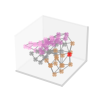

Iteration 1


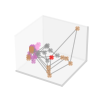

Iteration 2


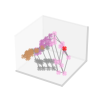

Iteration 3


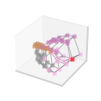

Iteration 4


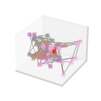

Iteration 5


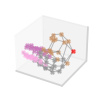

Iteration 6


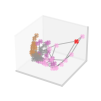

Iteration 7


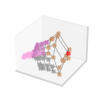

Iteration 8


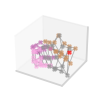

Iteration 9


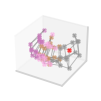

Iteration 10


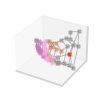

Iteration 11


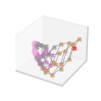

Iteration 12


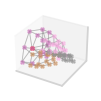

Iteration 13


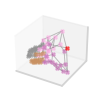

Iteration 14


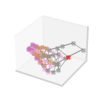

Iteration 15


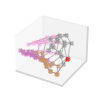

Iteration 16


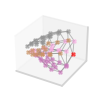

In [37]:
# MF
plot_latents_w_true_transitions(
    hue_order[0], savedir='1c_mf_latents')

Iteration 0


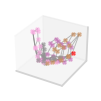

Iteration 1


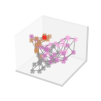

Iteration 2


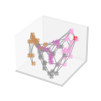

Iteration 3


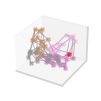

Iteration 4


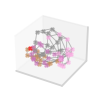

Iteration 5


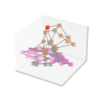

Iteration 6


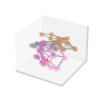

Iteration 7


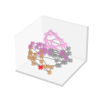

Iteration 8


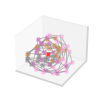

Iteration 9


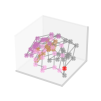

Iteration 10


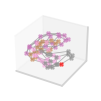

Iteration 11


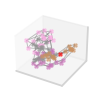

Iteration 12


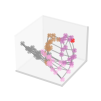

Iteration 13


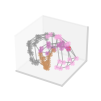

Iteration 14


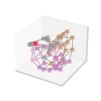

Iteration 15


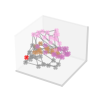

Iteration 16


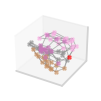

In [38]:
# MF + N
plot_latents_w_true_transitions(
    hue_order[1], savedir='1c_neg_latents')

Iteration 0


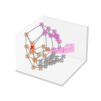

Iteration 1


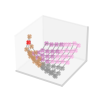

Iteration 2


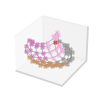

Iteration 3


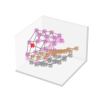

Iteration 4


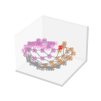

Iteration 5


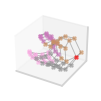

Iteration 6


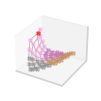

Iteration 7


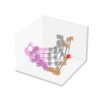

Iteration 8


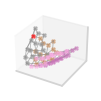

Iteration 9


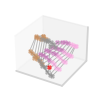

Iteration 10


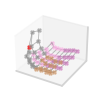

Iteration 11


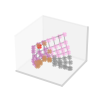

Iteration 12


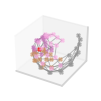

Iteration 13


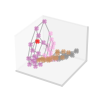

Iteration 14


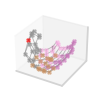

Iteration 15


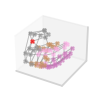

Iteration 16


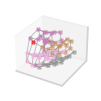

In [39]:
# MF + P/N
plot_latents_w_true_transitions(
    hue_order[-1], savedir='1c_pos_latents')

### 3D latent plots + estimated transitions

Iteration 0


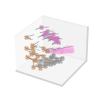

Iteration 1


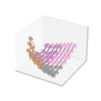

Iteration 2


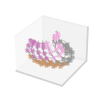

Iteration 3


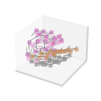

Iteration 4


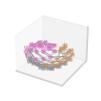

Iteration 5


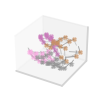

Iteration 6


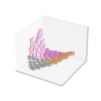

Iteration 7


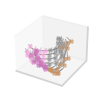

Iteration 8


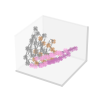

Iteration 9


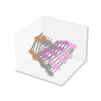

Iteration 10


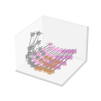

Iteration 11


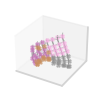

Iteration 12


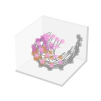

Iteration 13


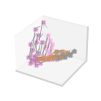

Iteration 14


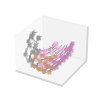

Iteration 15


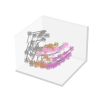

Iteration 16


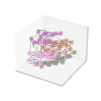

In [40]:
# MF + P/N
plot_latents_w_estimated_transitions(hue_order[-1])

# Comparing $\gamma$ timescales

### Parameters

In [4]:
internal_dim = 20
generic_exp_name = 'new_gridworld8x8_shuffobs'
network_yaml = 'dm_large_q'
episode = 600

In [5]:
internal_dim = 10
generic_exp_name = 'new_gridworld8x8'
network_yaml = 'dm'
episode = 350
hue_order = ['g0_-2_entro1',
    'g0.25_-2_entro0',
    'g0.5_-2_entro1',
    'g0.8_-4_entro1']

In [6]:
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and plot

In [7]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df_ep{episode}.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    transition_df = pickle.load(f)
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]
print(np.unique(repr_df.model))

['new_gridworld8x8_entro-1' 'new_gridworld8x8_entro-2'
 'new_gridworld8x8_entro0' 'new_gridworld8x8_entro1'
 'new_gridworld8x8_entro2' 'new_gridworld8x8_g0.25_-2_entro-1'
 'new_gridworld8x8_g0.25_-2_entro-2' 'new_gridworld8x8_g0.25_-2_entro0'
 'new_gridworld8x8_g0.25_-2_entro1' 'new_gridworld8x8_g0.25_-3_entro-1'
 'new_gridworld8x8_g0.25_-3_entro-2' 'new_gridworld8x8_g0.25_-3_entro0'
 'new_gridworld8x8_g0.25_-3_entro1' 'new_gridworld8x8_g0.5_-2_entro-1'
 'new_gridworld8x8_g0.5_-2_entro-2' 'new_gridworld8x8_g0.5_-2_entro0'
 'new_gridworld8x8_g0.5_-2_entro1' 'new_gridworld8x8_g0.5_-3_entro-1'
 'new_gridworld8x8_g0.5_-3_entro-2' 'new_gridworld8x8_g0.5_-3_entro0'
 'new_gridworld8x8_g0.5_-3_entro1' 'new_gridworld8x8_g0.8_-3_entro-1'
 'new_gridworld8x8_g0.8_-3_entro-2' 'new_gridworld8x8_g0.8_-3_entro0'
 'new_gridworld8x8_g0.8_-3_entro1' 'new_gridworld8x8_g0.8_-4_entro-1'
 'new_gridworld8x8_g0.8_-4_entro-2' 'new_gridworld8x8_g0.8_-4_entro0'
 'new_gridworld8x8_g0.8_-4_entro1' 'new_gridworld8x8

Iteration 0


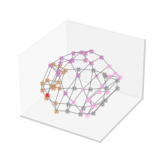

Iteration 1


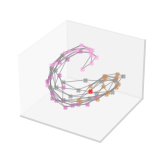

Iteration 2


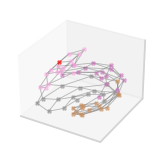

Iteration 3


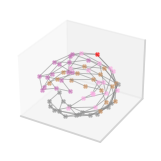

Iteration 4


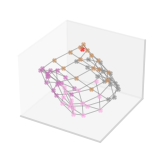

Iteration 5


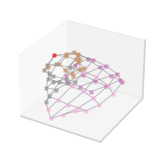

Iteration 6


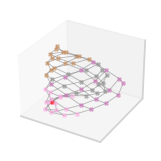

Iteration 7


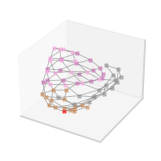

Iteration 8


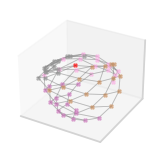

Iteration 9


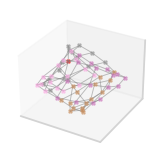

Iteration 10


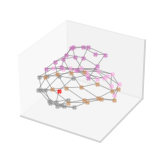

Iteration 11


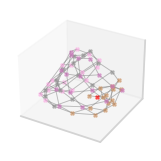

Iteration 12


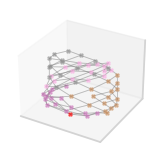

Iteration 13


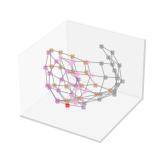

Iteration 14


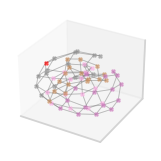

Iteration 15


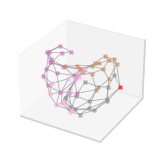

Iteration 16


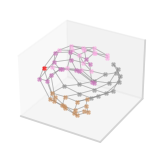

Iteration 17


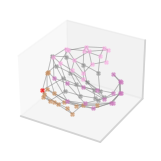

Iteration 18


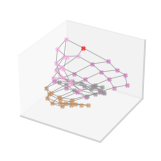

Iteration 19


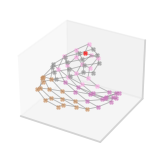

Iteration 20


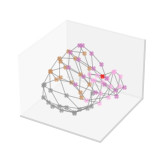

Iteration 21


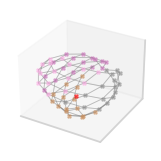

Iteration 22


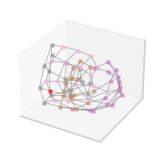

Iteration 23


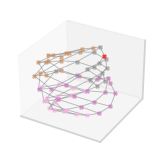

Iteration 24


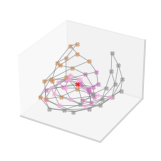

Iteration 25


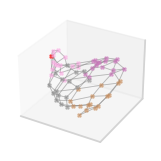

Iteration 26


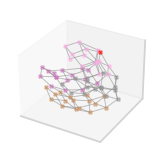

Iteration 27


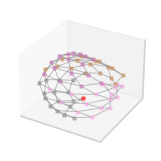

Iteration 28


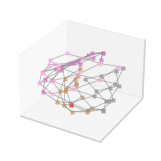

Iteration 29


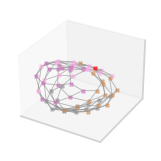

In [49]:
# Gamma 0
plot_latents_w_true_transitions(
    hue_order[0], savedir='3d_gamma0_latents', figsize=(1.5, 1.5))

Iteration 0


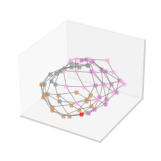

Iteration 1


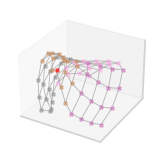

Iteration 2


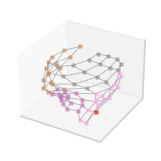

Iteration 3


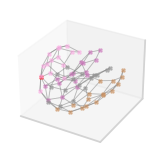

Iteration 4


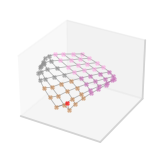

Iteration 5


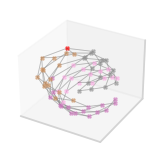

Iteration 6


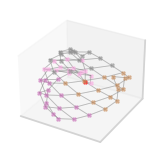

Iteration 7


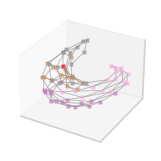

Iteration 8


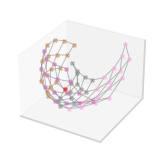

Iteration 9


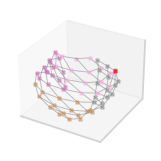

Iteration 10


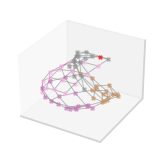

Iteration 11


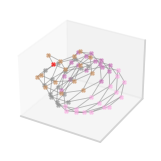

Iteration 12


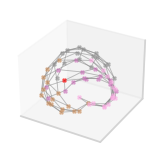

Iteration 13


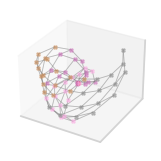

Iteration 14


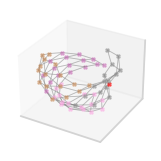

Iteration 15


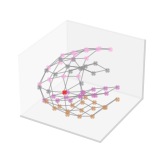

Iteration 16


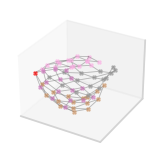

Iteration 17


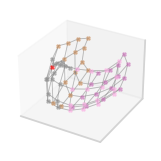

Iteration 18


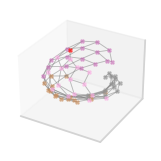

Iteration 19


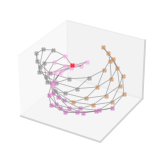

Iteration 20


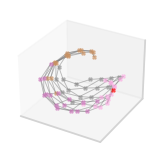

Iteration 21


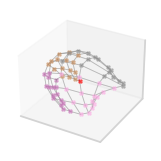

Iteration 22


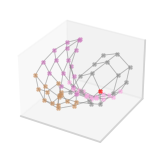

Iteration 23


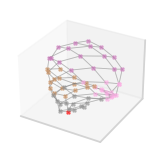

Iteration 24


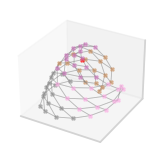

Iteration 25


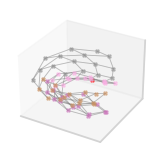

Iteration 26


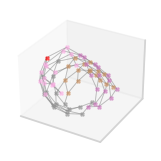

Iteration 27


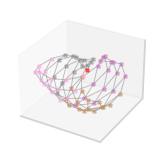

Iteration 28


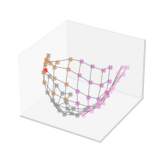

Iteration 29


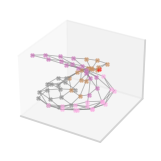

In [50]:
# Gamma 0.25
plot_latents_w_true_transitions(
    hue_order[1], savedir='3d_gamma0.25_latents', figsize=(1.5, 1.5))

Iteration 0


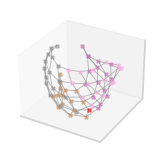

Iteration 1


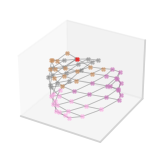

Iteration 2


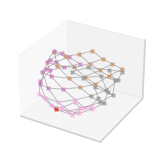

Iteration 3


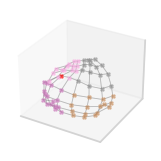

Iteration 4


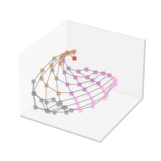

Iteration 5


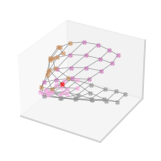

Iteration 6


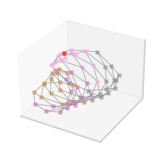

Iteration 7


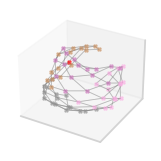

Iteration 8


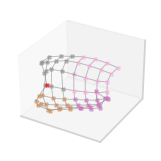

Iteration 9


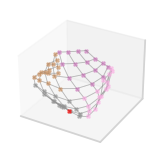

Iteration 10


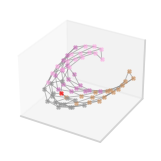

Iteration 11


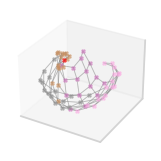

Iteration 12


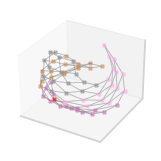

Iteration 13


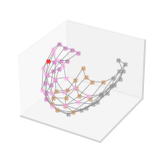

Iteration 14


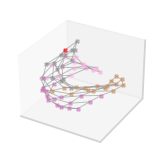

Iteration 15


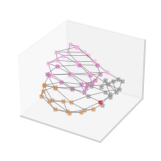

Iteration 16


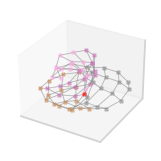

Iteration 17


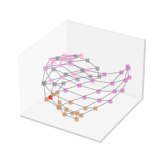

Iteration 18


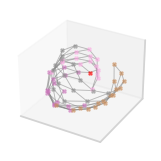

Iteration 19


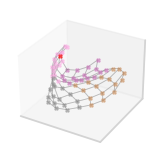

Iteration 20


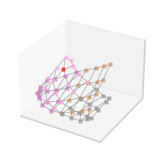

Iteration 21


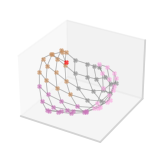

Iteration 22


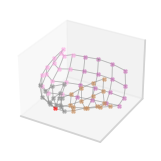

Iteration 23


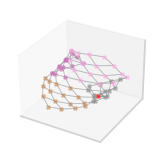

Iteration 24


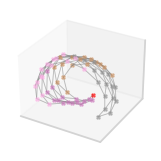

Iteration 25


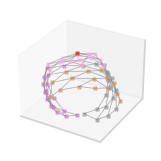

Iteration 26


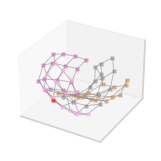

Iteration 27


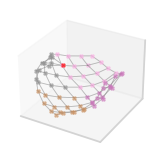

Iteration 28


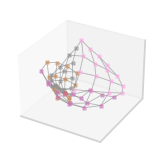

Iteration 29


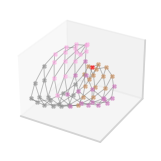

In [51]:
# Gamma 0.5
plot_latents_w_true_transitions(
    hue_order[2], savedir='3d_gamma0.5_latents', figsize=(1.5, 1.5))

Iteration 0


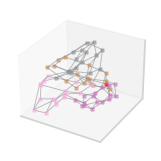

Iteration 1


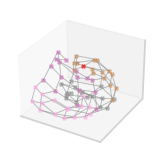

Iteration 2


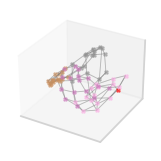

Iteration 3


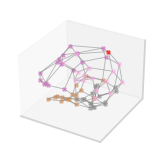

Iteration 4


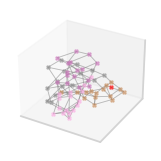

Iteration 5


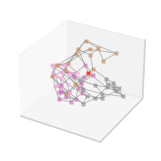

Iteration 6


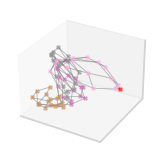

Iteration 7


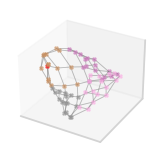

Iteration 8


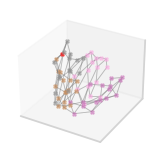

Iteration 9


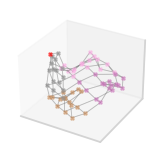

Iteration 10


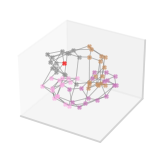

Iteration 11


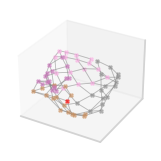

Iteration 12


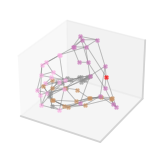

Iteration 13


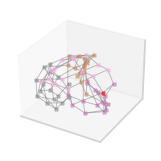

Iteration 14


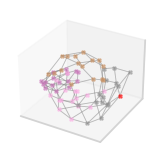

Iteration 15


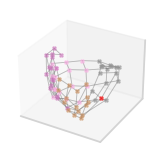

Iteration 16


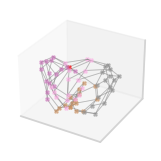

Iteration 17


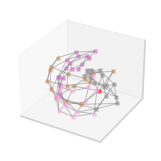

Iteration 18


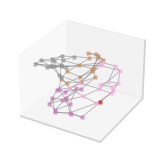

Iteration 19


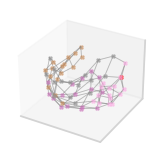

Iteration 20


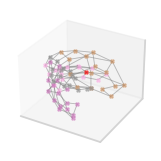

Iteration 21


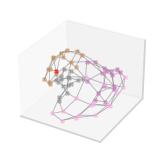

Iteration 22


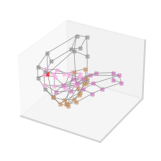

Iteration 23


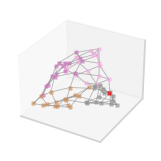

Iteration 24


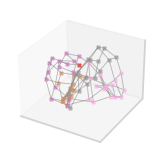

Iteration 25


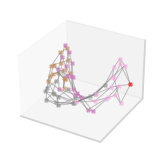

Iteration 26


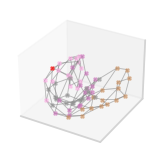

Iteration 27


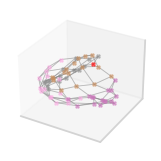

Iteration 28


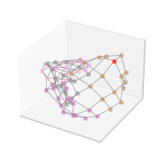

Iteration 29


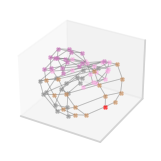

In [8]:
# Gamma 0.8
plot_latents_w_true_transitions(
    hue_order[-1], savedir='3d_gamma0.8_latents', figsize=(1.5, 1.5))